# Individual Assignment 1: ML Modeling Refresh (Spring 2024)


**OPIM 5509: Introduction to Deep Learning - University of Connecticut**

* Full Name: Patricia (PJ) Watson
* Student ID (7 digit number): 2887247

---------------------------------------------------------------------------

Each student must complete and submit their own file, but you may work with your group for help. I do not want to see direct copy and pasted code otherwise you will get a zero. This is a dataset on annual earnings (y) as a function of geographic and economic predictors.

**10 points each. 100 points**

  Use the file below to complete the following data wrangling and regression modeling. Good luck!


# Read the data

For some reason, gdown has recently been giving me issues - so here you can download and drag the file into your runtime.

Here is the link for:
* X_S24.csv = 'https://drive.google.com/file/d/10yZr6nZA1BV1Kp4C6UtLMKfynqFSPDY6/view?usp=drive_link'
* y_S24.csv = 'https://drive.google.com/file/d/1UXXQ_qr-vWg5RJTfSD5ESSc5Yeaev_1f/view?usp=drive_link'

    Import modules, mount Google Drive, read data.

    X_S24 and y_S24 csv files were downloaded using links provided, then uploaded to Data folder for OPIM_5509_Deep_Learning.

In [1]:
# import modules

import pandas as pd # for data analysis
import numpy as np # for numeric functions
# plots
import matplotlib.pyplot as plt
import seaborn as sns

# splitting and normalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# regression modeling
from sklearn.linear_model import LinearRegression # LR
from sklearn.ensemble import RandomForestRegressor # RFR

from sklearn.inspection import permutation_importance

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read data
# download data using links provided above, upload to Data file, copy path(s)

X_S24_df = pd.read_csv('/content/drive/MyDrive/OPIM_5509_Deep_Learning /Data/X_S24.csv')
y_S24_df = pd.read_csv('/content/drive/MyDrive/OPIM_5509_Deep_Learning /Data/y_S24.csv')

# Q1. Explore the dataset(s)
Get to know this new dataset! How many rows and columns are there? What are the data types of the columns in X (string vs numeric)? Are there any missing values?

    X_S24_df (geographic and economic predictors) has 5000 rows and 10 columns, all numeric dype float64, and there are no missing values in the dataframe. Nice and clean.
    
    Note that (3) fields are normalized: Age, Work Experience and Company Size.

    y_S24_df (annual earnings) has 5000 rows and 1 column, numeric dtype float64, and there are no missing values in the dataframe.
    There are, however, a large number of zeros, to be investigated.


    Approach: Look at shape of the data, column names, data types, missing values, starting with X_S24_df
    (geographic and econoimic predictors), followed by y_S24_df
    (annual earnings).

      Note the spaces in the column names - never a good thing.

      Initially, I found that retrieving feature names without removing
      column names spaces resulted in the spaces being used as a delimiter
      and each 'word' being identified as a feature name, incorrectly.

    Decision: Remove blanks from and shorten column names for plots,
    and to be able to retrieve feature names later for feature importance examination.



In [4]:
# X_S24_df (geographic and economic predictors)

# shape
print("This is the shape of X_S24_df :\n", X_S24_df.shape, '\n')

# column names
print("These are the column names for X_S24_df: \n", X_S24_df.columns, '\n')

# datatypes
print("These are the data types: \n", X_S24_df.dtypes)

print("\nThis is the head for X_S24_df:\n")
X_S24_df.head()

This is the shape of X_S24_df :
 (5000, 10) 

These are the column names for X_S24_df: 
 Index(['State Score', 'Education Score', 'Geography Score', 'Age (normalized)',
       'Career Advancement Opportunity Score', 'Job Satisfaction Score',
       'Health and Wellness Program Quality Score', 'Job Demand Score',
       'Work Experience (normalized)', 'Company Size (normalized)'],
      dtype='object') 

These are the data types: 
 State Score                                  float64
Education Score                              float64
Geography Score                              float64
Age (normalized)                             float64
Career Advancement Opportunity Score         float64
Job Satisfaction Score                       float64
Health and Wellness Program Quality Score    float64
Job Demand Score                             float64
Work Experience (normalized)                 float64
Company Size (normalized)                    float64
dtype: object

This is the head for

,State Score,Education Score,Geography Score,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized)
0,-0.488983,-0.650489,1.188653,-0.424041,0.126153,0.079847,0.615604,-0.387655,0.172021,-0.071714
1,0.857803,-0.744886,0.012302,-0.603159,0.450438,-2.208105,-1.536246,0.659717,1.049996,-1.642319
2,1.504650,-1.542571,-1.429606,-0.184382,0.008916,-0.122821,-1.013401,-0.029866,-0.396784,2.152012
3,-0.636917,-0.639321,-0.569536,-0.050816,-0.547571,2.037834,0.100880,0.120171,0.125213,-0.622810
4,2.099281,0.244244,-0.314890,0.740922,-0.419488,1.010743,-0.064267,0.455424,-0.970213,-0.961485


In [5]:
# using df.info() to examine missing values

print("These are the data types for X_S24_df: \n")
X_S24_df.info()

# we see from the Non-Null Count that all 5000 rows have data
# can also confirm missing values by entire dataframe and by column, below

These are the data types for X_S24_df: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   State Score                                5000 non-null   float64
 1   Education Score                            5000 non-null   float64
 2   Geography Score                            5000 non-null   float64
 3   Age (normalized)                           5000 non-null   float64
 4   Career Advancement Opportunity Score       5000 non-null   float64
 5   Job Satisfaction Score                     5000 non-null   float64
 6   Health and Wellness Program Quality Score  5000 non-null   float64
 7   Job Demand Score                           5000 non-null   float64
 8   Work Experience (normalized)               5000 non-null   float64
 9   Company Size (normalized)                  5000 non-nul

In [6]:
# missing values in entire dataframe
X_S24_df.isnull().sum().sum()

0

In [7]:
# missing values by column
X_S24_df.isnull().sum()

,0
State Score,0
Education Score,0
Geography Score,0
Age (normalized),0
Career Advancement Opportunity Score,0
Job Satisfaction Score,0
Health and Wellness Program Quality Score,0
Job Demand Score,0
Work Experience (normalized),0
Company Size (normalized),0


In [8]:
# y_S24_df (annual earnings)

# shape
print("This is the shape of y_S24_df :\n", y_S24_df.shape, '\n')

# column names
print("These are the column names for y_S24_df: \n", y_S24_df.columns, '\n')

# datatypes
print("These are the data types: \n", y_S24_df.dtypes)

print("\nThis is the head for y_S24_df:\n")
y_S24_df.head()

This is the shape of y_S24_df :
 (5000, 1) 

These are the column names for y_S24_df: 
 Index(['Annual Earnings'], dtype='object') 

These are the data types: 
 Annual Earnings    float64
dtype: object

This is the head for y_S24_df:



,Annual Earnings
0,61.864768
1,0.000000
2,0.000000
3,68.108952
4,230.784497


In [9]:
# using df.info() to examine missing values

print("These are the data types for y_S24_df: \n")
y_S24_df.info()

# we see from the Non-Null Count that all 5000 rows have data
# can also confirm missing values by entire dataframe and by column, below

These are the data types for y_S24_df: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Annual Earnings  5000 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


In [10]:
# missing values in entire dataframe
y_S24_df.isnull().sum().sum()

0

In [11]:
# missing values by column
y_S24_df.isnull().sum()

,0
Annual Earnings,0


In [12]:
# rename column headings to remove spaces and shorten names for plots

X_S24_df = X_S24_df.rename(columns={'State Score':'State', 'Education Score':'Education', 'Geography Score':'Geography', 'Age (normalized)':'Age',
       'Career Advancement Opportunity Score':'Career_Adv', 'Job Satisfaction Score':'Job_Sat', 'Health and Wellness Program Quality Score':'Health/Wellness',
       'Job Demand Score':'Job_Demand', 'Work Experience (normalized)':'Work_Exp', 'Company Size (normalized)':'Company_Size'})
y_S24_df = y_S24_df.rename(columns={'Annual Earnings':'Annual_Earnings'})

# check work
# column names
print("These are the column names for X_S24_df: \n", X_S24_df.columns, '\n')
print("These are the column names for y_S24_df: \n", y_S24_df.columns, '\n')

These are the column names for X_S24_df: 
 Index(['State', 'Education', 'Geography', 'Age', 'Career_Adv', 'Job_Sat',
       'Health/Wellness', 'Job_Demand', 'Work_Exp', 'Company_Size'],
      dtype='object') 

These are the column names for y_S24_df: 
 Index(['Annual_Earnings'], dtype='object') 



# Q2. Split into X_train, X_test, y_train, y_test.
Before we do any cleaning, let's split the data so that we can use fit_transform() on train and transform() on test. Use an 80/20 split, shuffle the data, and random state equal to **YOUR STUDENT ID**. Print the shape of X_train, X_test, y_train, y_test and make sure it makes sense to you.

    Approach: Subset data into X features and Y target variable for modeling.
    Conversion to Numpy arrays will be done after plots before running model
    to obviate the need to convert back to pandas for plots.
    
    Use train_test_split for data splitting 80/20; random seed = 2887247 and shuffle.
    Review split for reasonableness.
    
    This is the shape of Y : (5000, 1)
    This is the shape of X : (5000, 10)

    This is the shape of X_train : (4000, 10)
    This is the shape of X_test : (1000, 10)
    This is the shape of y_train : (4000, 1)
    This is the shape of y_test : (1000, 1)

In [13]:
# target variable is Y, 'Annual Earnings'

Y = y_S24_df
# check work
print("This is the shape of Y :", Y.shape, '\n')

# everything else is X
X = X_S24_df
# check work
print("This is the shape of X :", X.shape, '\n')

# split data 80/20, shuffle, use student number for random_state
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 2887247) # to reproduce randomness

print("This is the shape of X_train :", X_train.shape, '\n')
print("This is the shape of X_test :", X_test.shape, '\n')
print("This is the shape of y_train :", y_train.shape, '\n')
print("This is the shape of y_test :", y_test.shape, '\n')

# split looks good

# steamlined version of printing shape after split (as long as you remember the sequence)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

This is the shape of Y : (5000, 1) 

This is the shape of X : (5000, 10) 

This is the shape of X_train : (4000, 10) 

This is the shape of X_test : (1000, 10) 

This is the shape of y_train : (4000, 1) 

This is the shape of y_test : (1000, 1) 

(4000, 10) (1000, 10) (4000, 1) (1000, 1)


# Q3. Clean up the dataset.
Use your judgement on if any rows should be deleted - there are missing values in every column in X that need to get replaced!

Right now X and y are in different files, so be careful if you are dropping rows.

    There are NO missing values in the X and y dataframes, but:

    Approach: Examine the data more closely for strange values, any
    'logical' variables hiding as numerics, or any other weirdness
    using describe() for summary statistics.
    Examine rows where Annual_Earning = 0.

    Would it make sense to remove the rows representing 0 Annual_Earnings, as they might be true results?

    Decision: 2488 of 5000 rows have Annual_Earning = 0.
    These rows will NOT be deleted from the dfs as they represent almost 50% of the Y df.



In [14]:
# examine Y
Y.describe()

,Annual_Earnings
count,5000.000000
mean,75.439438
std,110.262103
min,0.000000
25%,0.000000
50%,1.122802
75%,126.907658
max,695.450055


In [15]:
# examine X
X.describe()

,State,Education,Geography,Age,Career_Adv,Job_Sat,Health/Wellness,Job_Demand,Work_Exp,Company_Size
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.028652,0.018241,0.015757,0.004890,0.012961,0.018218,-0.005375,-0.008035,0.016715,-0.016981
std,1.008419,0.985117,0.985917,0.998210,0.999196,1.009253,1.017983,0.996555,0.981910,1.017218
min,-3.581230,-3.696449,-4.199683,-3.429597,-4.281627,-3.618401,-3.740454,-3.838710,-3.611576,-4.088482
25%,-0.705773,-0.634969,-0.649327,-0.667627,-0.661581,-0.688040,-0.690529,-0.671862,-0.636700,-0.689913
50%,-0.020192,0.012030,0.003570,-0.007196,0.012131,0.025922,0.008622,-0.006657,0.018452,-0.025886
75%,0.631780,0.686435,0.676724,0.673112,0.685889,0.687442,0.676509,0.667588,0.687485,0.667343
max,3.561219,3.877207,3.691489,3.649854,3.609161,4.052979,3.595347,3.847528,3.693792,3.361579


In [16]:
# examine rows where Annual_Earning = 0; get value counts
y_S24_df[y_S24_df['Annual_Earnings'] == 0]['Annual_Earnings'].value_counts()

,count
Annual_Earnings,
0.0,2488


# Q4. Make three EDA plots and three EDA tables using X_train and y_train

    Plot 1: Histograms to show shape of the data in X_train and y_train.

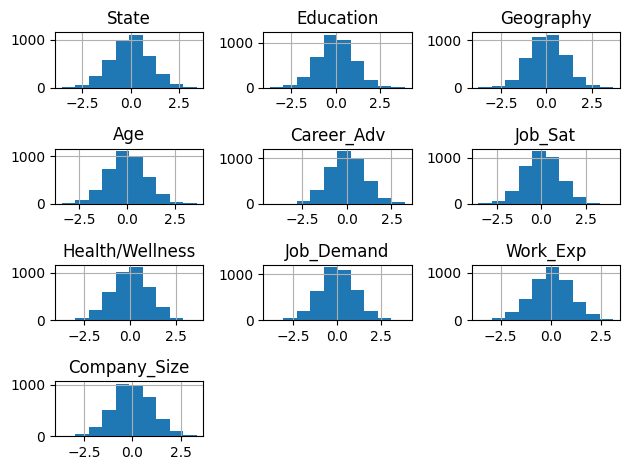

In [17]:
# histograms of ALL X_train and y_train variables

X_train.hist()
plt.tight_layout()
plt.show()


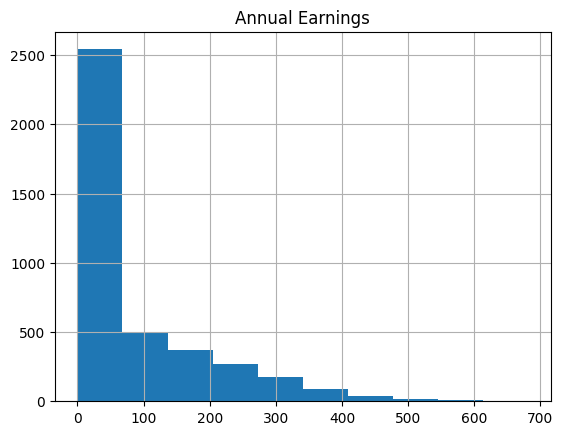

In [18]:
y_train.hist()
plt.title('Annual Earnings')
plt.show()

    Plot 2: Boxplot to visualize Annual_Earnings data


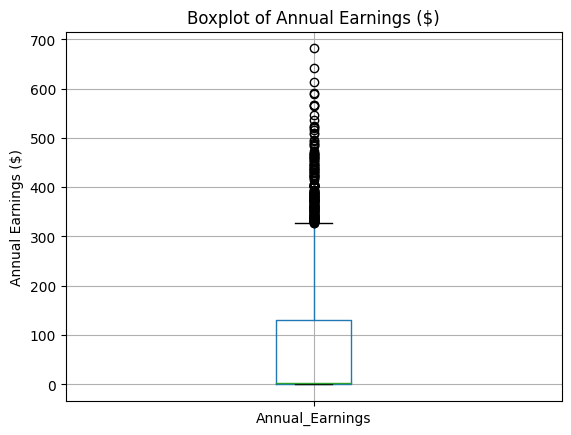

In [19]:
y_train.boxplot('Annual_Earnings')
plt.ylabel('Annual Earnings ($)')
plt.title("Boxplot of Annual Earnings ($)")
plt.show()

    Plots 3, 4: Bivariate scatterplots to examine relationships between features (Age and Education Scores) (Job Satisfaction Score and Career Advancement Opportunity Score)

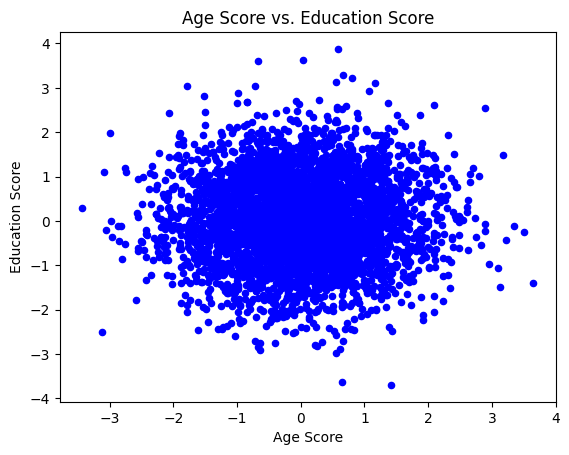

In [20]:
# examnine Age and Education
X_train.plot.scatter(x='Age', y='Education', color='blue')
plt.xlabel("Age Score")
plt.ylabel("Education Score")
plt.title("Age Score vs. Education Score")
plt.show()

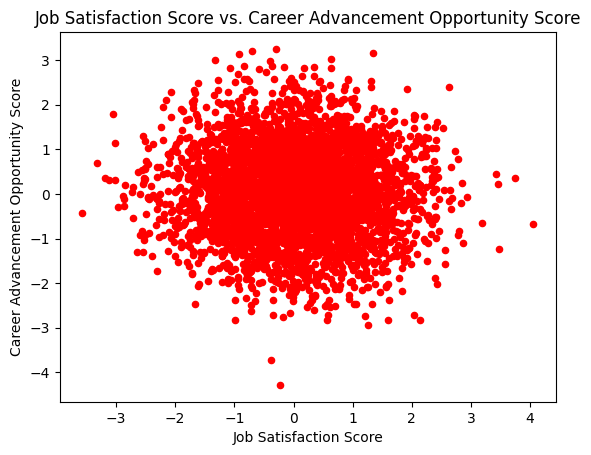

In [21]:
# examnine Job Satisfaction and Career Advancement Opportunity Score
X_train.plot.scatter(x='Job_Sat', y='Career_Adv', color='red')
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Career Advancement Opportunity Score")
plt.title("Job Satisfaction Score vs. Career Advancement Opportunity Score")
plt.show()

    Table 1: Summary statistics for X_train and y_train

In [22]:
X_train.describe()

,State,Education,Geography,Age,Career_Adv,Job_Sat,Health/Wellness,Job_Demand,Work_Exp,Company_Size
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.026453,0.020688,0.022831,-0.000158,0.022557,0.026311,-0.009039,-0.000955,0.027798,-0.014137
std,1.003463,0.980457,0.986957,0.992769,1.000025,1.007570,1.022682,1.000631,0.977365,1.015702
min,-3.581230,-3.696449,-3.767616,-3.429597,-4.281627,-3.570284,-3.740454,-3.838710,-3.611576,-3.669997
25%,-0.699984,-0.634650,-0.639628,-0.669137,-0.654905,-0.680664,-0.691292,-0.666487,-0.621527,-0.689142
50%,-0.015449,0.010892,0.009778,-0.013230,0.022227,0.032868,0.006898,-0.005677,0.031580,-0.027033
75%,0.628561,0.686435,0.681333,0.664381,0.709955,0.687106,0.683858,0.684912,0.691155,0.679791
max,3.419340,3.877207,3.691489,3.649854,3.251639,4.052979,3.595347,3.847528,3.113946,3.325065


In [23]:
y_train.describe()

,Annual_Earnings
count,4000.000000
mean,77.266967
std,112.331497
min,0.000000
25%,0.000000
50%,2.120224
75%,131.116003
max,681.632045


    Table 2: Create new flag variable for State_Score:
              0 if <= mean, 1 if > mean
              then examine Job_Satisfaction and Job_Demand grouped by the new variable

In [24]:
# new column to create a flag variable for State_Score
# 0 if less than or equal to the mean
# 1 if greater than the mean

X_train['FLAG_State_Score'] = np.where(X_train['State'] <= np.mean(X_train['State']), 0, 1)

print('The mean of State Score is:', X_train['State'].mean())
# check work, scroll rt
X_train.head()

The mean of State Score is: -0.026452689945907742


,State,Education,Geography,Age,Career_Adv,Job_Sat,Health/Wellness,Job_Demand,Work_Exp,Company_Size,FLAG_State_Score
3491,-1.762338,-0.134212,2.502266,-0.238102,-0.882067,0.659291,0.357599,-0.029806,0.874418,-0.890859,0
3384,-0.400794,0.147648,1.887867,0.141855,-1.280267,-0.021405,0.811406,-0.946864,0.916755,0.044468,0
3533,-0.360034,0.027199,-1.068329,0.299239,-0.642049,0.394077,-0.002027,0.795887,0.595177,-0.859257,0
1922,-1.039848,1.506513,-0.355225,1.900752,1.712523,1.535857,-0.383382,1.168840,0.207494,0.736868,0
2082,0.388887,0.613396,2.182689,-0.977427,-1.734778,0.224154,0.892422,-0.079237,0.345380,1.525107,1


In [25]:
# examnine Job_Satisfaction and Job_Demand grouped by State_Score
X_train.groupby('FLAG_State_Score')[['Job_Sat', 'Job_Demand']].describe()

Job_Sat                                                    \
                   count      mean       std       min       25%       50%   
FLAG_State_Score                                                             
0                 1981.0  0.030858  0.998673 -3.570284 -0.661645  0.017629   
1                 2019.0  0.021849  1.016452 -3.318227 -0.691350  0.043604   

                                     Job_Demand                                \
                       75%       max      count      mean       std       min   
FLAG_State_Score                                                                
0                 0.681015  3.738425     1981.0  0.002504  0.986644 -3.838710   
1                 0.690116  4.052979     2019.0 -0.004349  1.014401 -3.274681   

                                                          
                       25%       50%       75%       max  
FLAG_State_Score                                          
0                -0.637907 -0.004605  0.681509  3.847528  
1                -0.687303 -0.006534  0.688450  3.626484

In [26]:
# cleanup: drop FLAG_State_Score from X_train
X_train = X_train.drop(columns=['FLAG_State_Score'])

# check work
# shape
print("This is the shape of X_train :", X_train.shape, '\n')

# column names
print("These are the column names for X_train: \n", X_train.columns, '\n')

This is the shape of X_train : (4000, 10) 

These are the column names for X_train: 
 Index(['State', 'Education', 'Geography', 'Age', 'Career_Adv', 'Job_Sat',
       'Health/Wellness', 'Job_Demand', 'Work_Exp', 'Company_Size'],
      dtype='object') 



    Table 3: Examine Annual_Earnings quantiles more discretely

In [27]:
y_train.quantile([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0])

,Annual_Earnings
0.1,0.000000
0.2,0.000000
0.3,0.000000
0.4,0.000000
0.5,2.120224
0.6,50.297548
0.7,100.893112
0.8,159.140675
0.9,250.852367
1.0,681.632045


# Q5. Subset columns for X
Use every column in `X` except 'State Score' to build your model.

  **Useful link for subsetting rows and columns:** https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html

In [28]:
# drop column 'State' from X, X_train and X_test
X = X.drop(columns=['State'])
X_train = X_train.drop(columns=['State'])
X_test = X_test.drop(columns=['State'])

# check work
# shape
print("This is the shape of X :", X.shape, '\n')

# column names
print("These are the column names for X: \n", X.columns, '\n')

# shape
print("This is the shape of X_train :", X_train.shape, '\n')

# column names
print("These are the column names for X_train: \n", X_train.columns, '\n')

# shape
print("This is the shape of X_test :", X_test.shape, '\n')

# column names
print("These are the column names for X_test: \n", X_test.columns, '\n')

This is the shape of X : (5000, 9) 

These are the column names for X: 
 Index(['Education', 'Geography', 'Age', 'Career_Adv', 'Job_Sat',
       'Health/Wellness', 'Job_Demand', 'Work_Exp', 'Company_Size'],
      dtype='object') 

This is the shape of X_train : (4000, 9) 

These are the column names for X_train: 
 Index(['Education', 'Geography', 'Age', 'Career_Adv', 'Job_Sat',
       'Health/Wellness', 'Job_Demand', 'Work_Exp', 'Company_Size'],
      dtype='object') 

This is the shape of X_test : (1000, 9) 

These are the column names for X_test: 
 Index(['Education', 'Geography', 'Age', 'Career_Adv', 'Job_Sat',
       'Health/Wellness', 'Job_Demand', 'Work_Exp', 'Company_Size'],
      dtype='object') 



# Q6. Use fit_transform() from StandardScaler() on X_train. Use transform() to apply that StandardScaler() to X_test.


In [29]:
# Need the feature names before running any model to be able to assign
# feature importance to a feature name. If we extract feature names after
# running the model, the result is only "feature 0" etc.

# get feature names
feature_names = X_train.columns
print(feature_names)

Index(['Education', 'Geography', 'Age', 'Career_Adv', 'Job_Sat',
       'Health/Wellness', 'Job_Demand', 'Work_Exp', 'Company_Size'],
      dtype='object')


In [30]:
# convert files to numpy arrays (DrD: for neural networks to ensure all data is numeric)
# do this before running model but after running plots which use pandas dfs

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [31]:
# standard scaler
# use fit_transform() from StandardScaler() on X_train
# use transform() to apply that StandardScaler() to X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # apply to test partition

# Q7. Fit a random forest regressor (or any other sklearn) model on X_train. Call your model object `clf`.

Then create two new variables, `train_preds` and `test_preds`, which are the predictions from your model. For example, you will use `train_preds = clf.predict(X_train)` for `X_train` . Calculate error metrics of MAE and R2 for train and test results.

In [32]:
# make a variable to store the general model
RFR = RandomForestRegressor()

# fit the model, call model object "clf"
clf = RFR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [33]:
# store the predictions
train_preds= clf.predict(X_train)
test_preds= clf.predict(X_test)

In [34]:
# MAE - for Random Forest Regression
print("This is train MAE (RFR):", mean_absolute_error(y_train, train_preds)) # train
print("This is test MAE (RFR):", mean_absolute_error(y_test, test_preds)) # test

This is train MAE (RFR): 15.265351996551733
This is test MAE (RFR): 39.44424105756976


In [35]:
# R2 value - for Random Forest Regression
print("This is train R2 (RFR):", r2_score(y_train, train_preds)) # train
print("This is test R2 (RFR):", r2_score(y_test, test_preds)) # test

This is train R2 (RFR): 0.9581287684433062
This is test R2 (RFR): 0.6811108350633568


# Q8. Make two scatterplots of actual vs. predicted. One for train results, one for test results.
With nicely labeled title and axis (like we did in class).

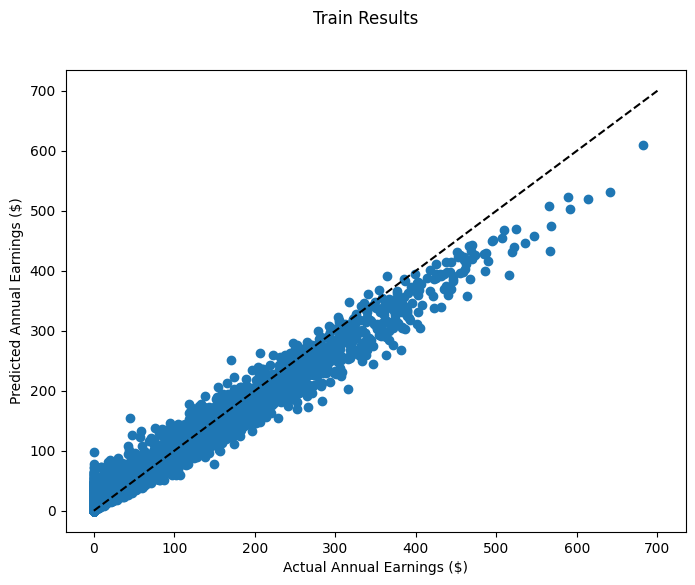

In [36]:
# scatterplot of actual vs predicted for train results

plt.figure(figsize=(8, 6))
plt.scatter(x=y_train, y=train_preds)
plt.plot([0, 700], [0, 700], '--k') # 45 degree line
plt.axis('tight')

plt.xlabel('Actual Annual Earnings ($)')
plt.ylabel('Predicted Annual Earnings ($)')
plt.suptitle('Train Results')
plt.show()

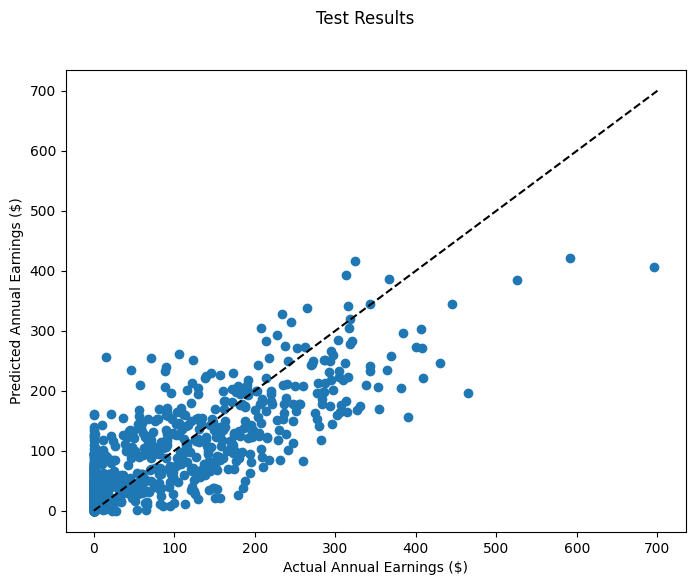

In [37]:
# scatterplot of actual vs predicted for test results

plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=test_preds)
plt.plot([0, 700], [0, 700], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('Actual Annual Earnings ($)')
plt.ylabel('Predicted Annual Earnings ($)')
plt.suptitle('Test Results')
plt.show()

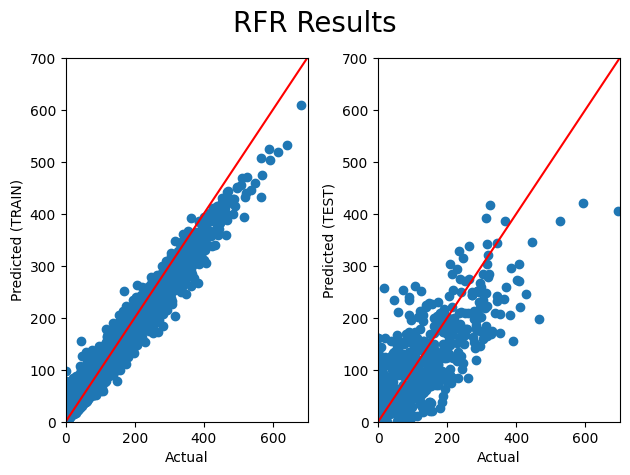

In [38]:
# plot graphs side by side for better visualization of comparison

# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# add a main title across top
fig.suptitle("RFR Results", fontsize=20)

# this makes the individual subplots (left hand side = train results, rt side = test)
axes[0].scatter(x=y_train, y=train_preds) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
# set plot limits
axes[0].set_xlim(0,700)
axes[0].set_ylim(0,700)
# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_test, y=test_preds) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
# set plot limits
axes[1].set_xlim(0,700)
axes[1].set_ylim(0,700)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# scooch it down
# link: https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

# Q9. Try a simple model - does it work?

Examine variable importance and build a simpler model (you can use tree importance from random forest or permutation importance.) You are building a model with less features, so it should be as good or slightly less better than your current model.

* https://scikit-learn.org/stable/modules/permutation_importance.html
* https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Calculate error metrics and make one scatterplot of actual vs. predicted results for this new holdout sample.

Were you able to get similar results?

    Background: Feature importances are provided by the fitted
    attribute feature_importances_ and they are computed as
    the mean and standard deviation of accumulation of the impurity
    decrease within each tree.
    
    Permutation feature importance is a model inspection
    technique that measures the contribution of each feature to a
    fitted model’s statistical performance on a given tabular dataset.
    This technique is particularly useful for non-linear or opaque
    estimators, and involves randomly shuffling the values of a single
    feature and observing the resulting degradation of the model’s score.
    By breaking the relationship between the feature and the target,
    we determine how much the model relies on such particular feature.

    The MAE value indicates the average absolute error between predicted
    and actual values. The smaller the MAE, the better the model’s
    predictions align with the actual data. A MAE of 0 would mean a
    perfect prediction, but in most cases, achieving such perfection
    is unlikely. Unlike Mean Squared Error (MSE), which squares the
    errors and can be influenced by outliers, MAE provides a more
    balanced representation of errors. It treats positive and negative
    errors equally, making it a good choice when the direction of errors
    isn’t critical.
    https://medium.com/@m.waqar.ahmed/understanding-mean-absolute-error-mae-in-regression-a-practical-guide-26e80ebb97df#:~:text=The%20MAE%20value%20itself%20indicates,achieving%20such%20perfection%20is%20unlikely.

    The R2 score compares how much better the linear regression line is
    than the y-mean line. If the R2 score is zero, then the amount of
    error in both lines is the same, i.e., both lines are overlapped.
    If the R2 score is one, then there is no error in the regression
    line, which is perfect. The more you move towards perfection, the
    more the R2 score moves towards 1.
    https://medium.com/@pp1222001/regression-metrics-mse-mae-and-rmse-r2-score-and-adjusted-r2-score-3541cec18a10


    Approach: Plot feature importances in descending order.
              Identify features to be dropped from X.
              Rerun RFR and compare MAE and R2 score results pre and post feature reduction.
    Results:
            Original RFR:
            This is train MAE (RFR): 15.29574591587837
            This is test MAE (RFR): 39.06556807265715

            This is train R2 (RFR): 0.9581724325327619
            This is test R2 (RFR): 0.6802282528454533

            RFR after feature reduction:
            This is train MAE (RFR) after feature reduction: 14.707122873031233
            This is test MAE (RFR) after feature reduction: 37.83386546533477

            This is train R2 (RFR after feature reduction): 0.9595269853149492
            This is test R2 (RFR) after feature reduction: 0.6928460916492021

    YES, the model improved with the new holdout sample
    (reduced feature list consisting of Job_Demand, Job_Satisfaction,
    Career_Adv, Health/Wellness and Geography).
    MAE scores for the RFR model after feature reduction decreased
    and R2 scores increased (see table above), thus both metrics indicated
    that the reduced feature holdout sample produced a better model.

In [39]:
# feature importances
clf.feature_importances_

array([0.02644659, 0.13792776, 0.02434093, 0.16888694, 0.22307721,
       0.1488237 , 0.22065485, 0.0252583 , 0.02458371])

In [40]:
# refresh feature_names
print(feature_names)

Index(['Education', 'Geography', 'Age', 'Career_Adv', 'Job_Sat',
       'Health/Wellness', 'Job_Demand', 'Work_Exp', 'Company_Size'],
      dtype='object')


<BarContainer object of 9 artists>

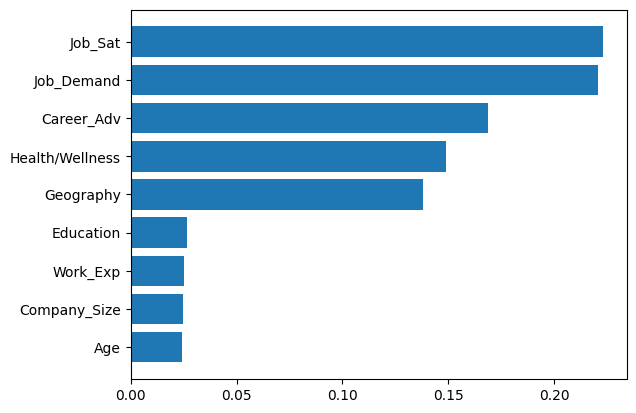

In [41]:
# plot feature importances to assess which features to drop
# sort by descending importance
sorted_idx = clf.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx], clf.feature_importances_[sorted_idx])

In [42]:
# refresh X
# shape
print("This is the shape of X before dropping 4 features:", X.shape, '\n')
# column names
print("These are the column names for X: \n", X.columns, '\n')

# drop columns 'Work_Exp', 'Company_Size', 'Education' and 'Age' from X
X = X.drop(columns=['Work_Exp', 'Company_Size', 'Education', 'Age'])

# check work
# shape
print("This is the shape of X after dropping 4 features:", X.shape, '\n')

# column names
print("These are the column names for X after dropping 4 features: \n", X.columns, '\n')


This is the shape of X before dropping 4 features: (5000, 9) 

These are the column names for X: 
 Index(['Education', 'Geography', 'Age', 'Career_Adv', 'Job_Sat',
       'Health/Wellness', 'Job_Demand', 'Work_Exp', 'Company_Size'],
      dtype='object') 

This is the shape of X after dropping 4 features: (5000, 5) 

These are the column names for X after dropping 4 features: 
 Index(['Geography', 'Career_Adv', 'Job_Sat', 'Health/Wellness', 'Job_Demand'], dtype='object') 



In [43]:
# split data 80/20, shuffle, use student number for random_state
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 2887247) # to reproduce randomness

print("This is the shape of X_train :", X_train.shape, '\n')
print("This is the shape of X_test :", X_test.shape, '\n')
print("This is the shape of y_train :", y_train.shape, '\n')
print("This is the shape of y_test :", y_test.shape, '\n')

# split looks good

This is the shape of X_train : (4000, 5) 

This is the shape of X_test : (1000, 5) 

This is the shape of y_train : (4000, 1) 

This is the shape of y_test : (1000, 1) 



In [44]:
# convert files to numpy arrays (DrD: for neural networks to ensure all data is numeric)
# do this before running model but after running plots which use pandas dfs

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [45]:
# standard scaler
# use fit_transform() from StandardScaler() on X_train
# use transform() to apply that StandardScaler() to X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # apply to test partition

In [46]:
# make a variable to store the general model
# clfv2 is the RFR model with reduced features
RFR = RandomForestRegressor()

# fit the model, call model object "clf"
clfv2 = RFR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [47]:
# store the predictions
train_preds= clfv2.predict(X_train)
test_preds= clfv2.predict(X_test)

In [48]:
# MAE - for Random Forest Regression after feature reduction
print("This is train MAE (RFR) after feature reduction:", mean_absolute_error(y_train, train_preds)) # train
print("This is test MAE (RFR) after feature reduction:", mean_absolute_error(y_test, test_preds)) # test

This is train MAE (RFR) after feature reduction: 14.508517600935214
This is test MAE (RFR) after feature reduction: 38.18157596497906


In [49]:
# R2 value - for Random Forest Regression after feature reduction
print("This is train R2 (RFR after feature reduction):", r2_score(y_train, train_preds)) # train
print("This is test R2 (RFR) after feature reduction:", r2_score(y_test, test_preds)) # test

This is train R2 (RFR after feature reduction): 0.9610461191134962
This is test R2 (RFR) after feature reduction: 0.6876517391062988


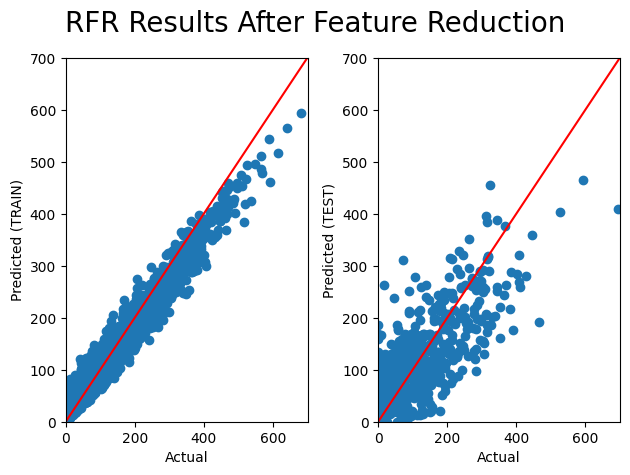

In [50]:
# plot graphs side by side for better visualization of comparison

# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# add a main title across top
fig.suptitle("RFR Results After Feature Reduction", fontsize=20)

# this makes the individual subplots (left hand side = train results, rt side = test)
axes[0].scatter(x=y_train, y=train_preds) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
# set plot limits
axes[0].set_xlim(0,700)
axes[0].set_ylim(0,700)
# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_test, y=test_preds) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
# set plot limits
axes[1].set_xlim(0,700)
axes[1].set_ylim(0,700)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# scooch it down
# link: https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

# Q10. Five good bullets
Write five good bullets about what you learned in this assignment. Make sure comments on the shape of the data and the results of your experiments. Be quantitative and tell a story of what you saw!

    Bullet 1: Examining the data, we saw from the histograms and summary
    tables for the geographic and economic predictors file (X_S24) that
    the data are normally distributed with similar mins and maxs. Some of the
    columns were noted as "normalized" but without having any background
    on how the data were collected/generated, it's hard to know
    what impact the "normalization" had on the data.
    Examining data for Annual Earnings (y_S24), we saw that almost half
    of the rows had 0 values, and a decision had to be made to keep or drop
    these rows in the X and Y datasets. Not knowing whether a
    zero Annual_Earning was valid for the instance, and given the
    large number of zero rows, I chose to not drop the rows.

    Bullet 2: Examining Job_Satisfaction and Job_Demand scores grouped
    by State_Score, where a State_Score <= its mean was coded as 0 and > mean
    as 1, I expected/hoped to see a tanglible difference in
    Job_Satisfaction and Job_Demand scores based on whether the
    State_Score was below or above its mean. This was not the case.

    Bullet 3: The RFR side by side plots of actual vs predicted values
    for train and test show scatterplots that are generally similar in shape
    (and axes were checked for consistency), although test may have
    missed some of the more extreme outliers.



    Bullet 4: Feature reduction improved the RFR model, but only slightly.
    By first looking at feature importance and then dropping
    less important columns for a holdout sample and rerunning the
    RFR, we saw an improvement, but not a massive improvement:

        Original RFR:
        This is train MAE (RFR): 15.29574591587837
        This is test MAE (RFR): 39.06556807265715
        RFR after feature reduction:
        This is train MAE (RFR) after feature reduction: 14.707122873031233
        This is test MAE (RFR) after feature reduction: 37.83386546533477

    The declines in MAE for the reduced feature model amounted to
    between a 3.3-4% reduction. Good? but it would be interesting to
    rerun with only the top 2 or 3 features instead of the top 5.

    Similarly, the improvement in R2 scores was evident but marginal:

        Original RFR:
        This is train R2 (RFR): 0.9581724325327619
        This is test R2 (RFR): 0.6802282528454533
        RFR after feature reduction:    
        This is train R2 (RFR after feature reduction): 0.9595269853149492
        This is test R2 (RFR) after feature reduction: 0.6928460916492021

    Bullet 5: Excluding just a few outliers, the side by side plots of test
    and train actual vs predicted results for the reduced feature set
    model show that 1) test and train scatterplots are similar and
    2) there seems to have been an improvement particularly just under
    the 45 degree line in the area of 300-400 actual earnings for test,
    compared to the original RFR model.
    The scatterplot for test actual vs predicted is slightly denser
    around the 45 degree line than that of the original model.